### Introduction
SyriaTel is trying to understand the churn level of its customers and what should be done to maximize profits.

### Business Understanding

##### Problem statement
This project aims to help and guide SyriaTel on predicting the patterns that leads to customers churn. By doing so, SyriaTel will be able to manimize the losses incured due to the customers that don't still around for long. At the end, with the predictions SyriaTel will be able to make better decisions based on the final recomendations derived from the in depth Data analysis.

 ## Data Understanding

 * state - the state the user lives in
 * account length - the number of days the user has this account
 * area code - the code of the area the user lives in
 * phone number - the phone number of the user
 * international plan - true if the user has the international plan, otherwise false
 * voice mail plan - true if the user has the voice mail plan, otherwise false
 * number vmail messages - the number of voice mail messages the user has sent
 * total day minutes - total number of minutes the user has been in calls during the day
 * total day calls - total number of calls the user has done during the day
 * total day charge - total amount of money the user was charged by the Telecom company for calls during the day
 * total eve minutes - total number of minutes the user has been in calls during the evening
 * total eve calls - total number of calls the user has done during the evening
 * total night minutes - total number of minutes the user has been in calls during the night
 * total night calls - total number of calls the user has done during the night
 * total night charge - total amount of money the user was charged by the Telecom company for calls during the night
 * total intl minutes - total number of minutes the user has been in international calls
 * total intl calls - total number of international calls the user has done
 * total intl charge - total amount of money the user was charged by the Telecom company for international calls
 * customer service calls - number of customer service calls the user has done
 * churn - true(encoded as 1) if the user terminated the contract, otherwise false(encoded as 0)

### Loading Data

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [2]:
# loading and reading into the data
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [3]:
# checking the columns and the info
print(df.columns)
print(df.info())

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null  

### Data cleaning

In [4]:
# checking the missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [5]:
def duplicates(data=df):
    # Checking for duplicates
    duplicates = df.duplicated().sum()
    
    print(f' {duplicates}')
    print(f' {round(duplicates/len(df) * 100, 2)}% of the total data is duplicates.')


duplicates(df)



 0
 0.0% of the total data is duplicates.


In [6]:
#checking for extraneous values to make sure there is no more missing data or unknown characters 
for col in df.columns:
    print(col,'\n', df[col].value_counts(normalize=True),'\n\n')

state 
 WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
OR    0.023402
OH    0.023402
WI    0.023402
VA    0.023102
WY    0.023102
CT    0.022202
ID    0.021902
VT    0.021902
MI    0.021902
TX    0.021602
UT    0.021602
IN    0.021302
KS    0.021002
MD    0.021002
NC    0.020402
NJ    0.020402
MT    0.020402
NV    0.019802
CO    0.019802
WA    0.019802
MS    0.019502
RI    0.019502
MA    0.019502
AZ    0.019202
MO    0.018902
FL    0.018902
NM    0.018602
ME    0.018602
ND    0.018602
OK    0.018302
NE    0.018302
DE    0.018302
SC    0.018002
SD    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
GA    0.016202
DC    0.016202
TN    0.015902
HI    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: state, dtype: float64 


account length 
 105    0.012901
87     0.012601
93     0.012001
101    0.012001
90     0.011701
         ...   
191    0.000300
199    0.000300
215    0.000300
221    0.000300
2      0.000300
Nam

In [7]:
#data description
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


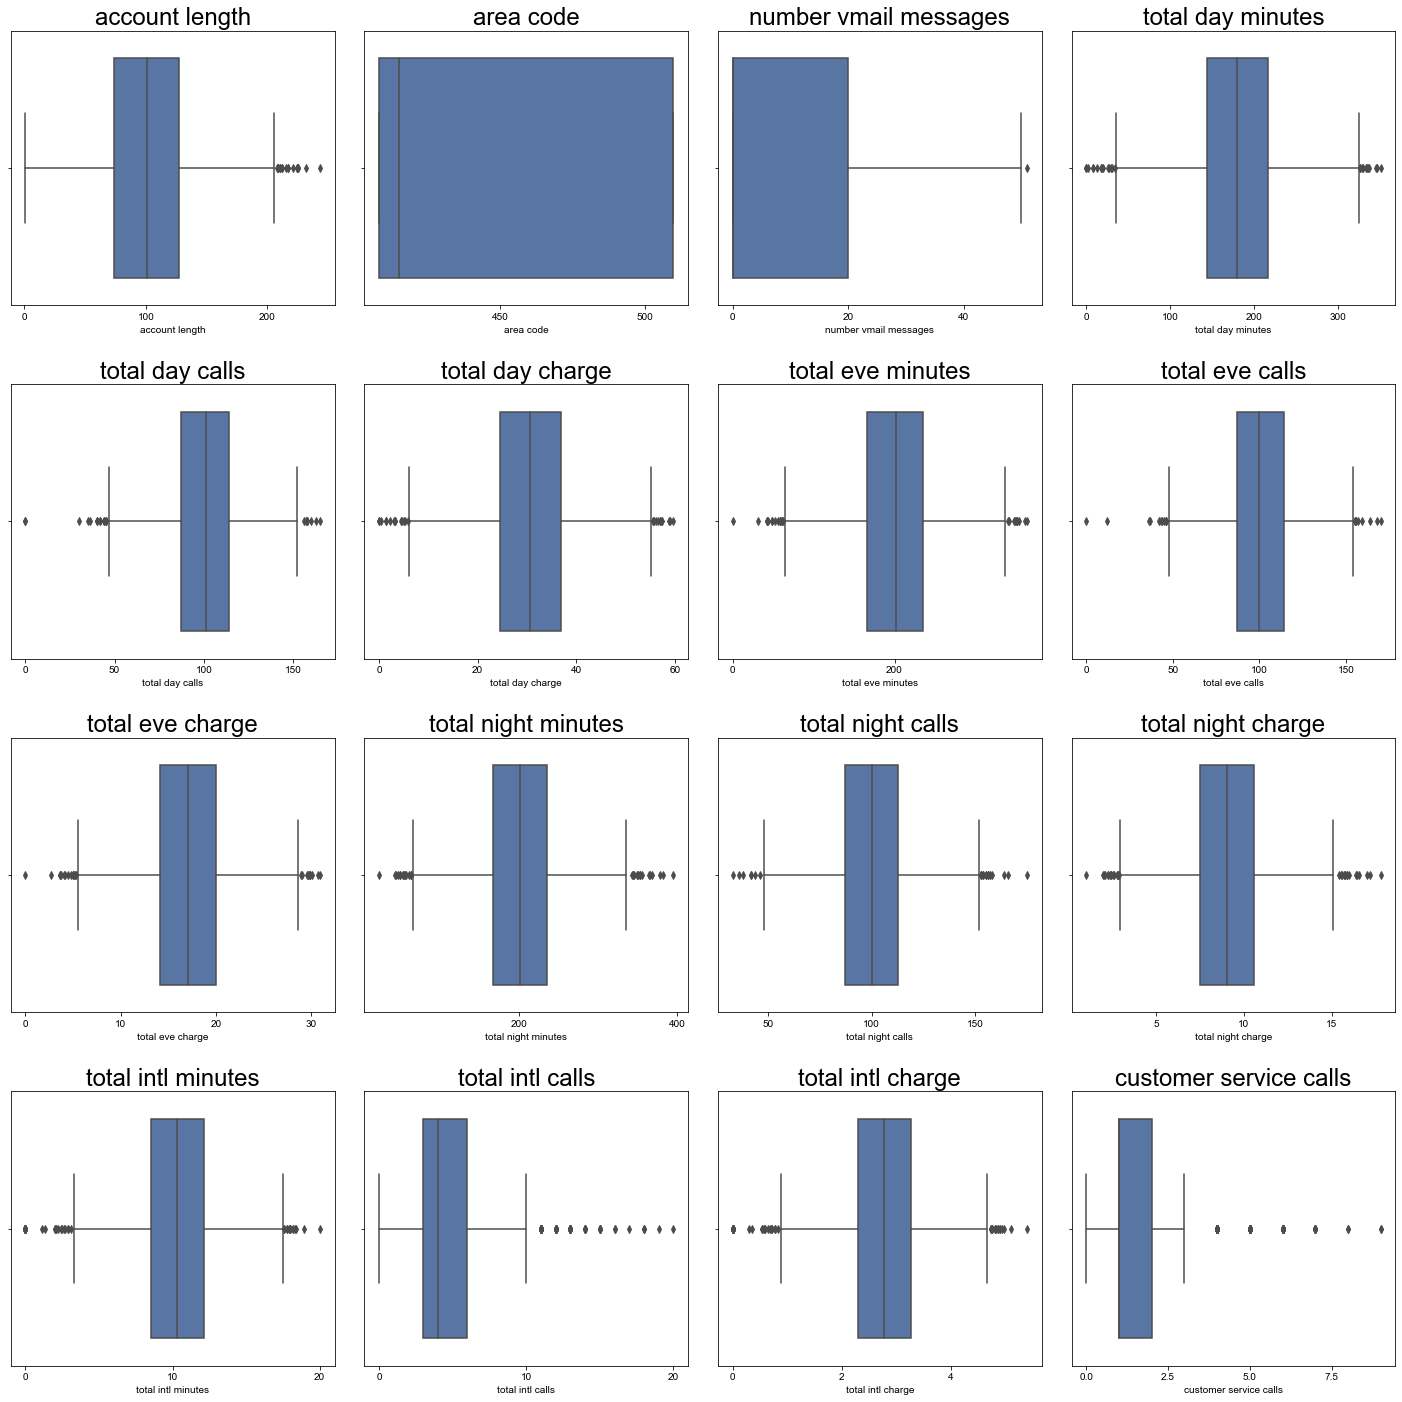

In [8]:
# checking and visualizing outliers 

def plot_boxplots(df, cols):
    fig, axes = plt.subplots(4, 4, figsize=(20,20))
    axes = axes.ravel()
    sns.set(font_scale=2.0)
    for i, col in enumerate(cols):

        # converting the x-axis variable to a numeric data type
        
        df[col] = df[col].astype(float)
        sns.boxplot(x=df[col], ax=axes[i])
        
        axes[i].set_title(col)
    plt.tight_layout()

# specify the columns to plot

cols = ['account length', 'area code','number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']

plot_boxplots(df, cols)

 ### EDA

 ### EDA guiding questions 
  - Is there a relationship between people with the least total charges and churn status?
  - Does the customer service calls rate affect the churn status?
  - What is the relationship between account length have with the churn status?
  - Does the area code affect the churn status?
  - The effects of total minutes with to the churn status.
  - International total usage compared to the churn status.

In [9]:
# import the necesary sklearn libraries
import sklearn.datasets as datasets
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

###### churn distribution

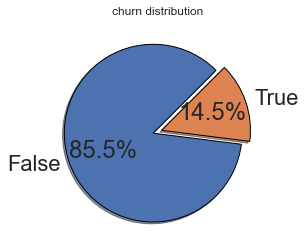

In [10]:
# plotting a pie chart for churn distribution
# autopct='%1.1f%%' to check for percentages
slices = df['churn'].value_counts().values
labels = df['churn'].value_counts().index
explode = [0.05, 0.05]
plt.pie(slices, labels=labels, wedgeprops={'edgecolor': 'black'}, explode=explode, shadow=True, autopct='%1.1f%%', startangle=45)
plt.title('churn distribution', fontsize = 12)
plt.tight_layout()
plt.show()

 - 85.5 % of the customers stayed while 14.5% did churn. 

#### Distribution of charges

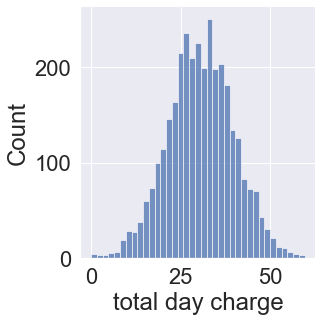

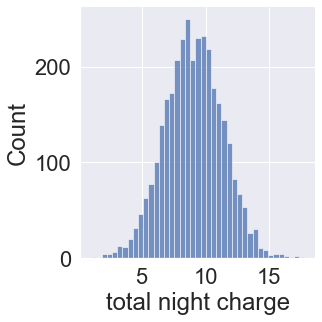

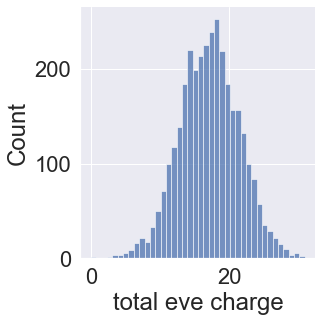

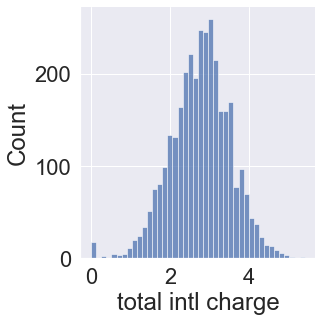

In [11]:
#checking for the distribution of day, evening, night and international charges to check the normalization of the data

sns.displot(data = df, x = 'total day charge',fill= True);

sns.displot(data = df, x = 'total night charge',fill= True);

sns.displot(data = df, x = 'total eve charge',fill= True);

sns.displot(data = df, x = 'total intl charge',fill= True);

 * The data is normally distributed for the charges

#### Label encoding

In [12]:
#encoding churn variables to make it easier for analysis
#Churn True = 1, churn False = 0
encoder = LabelEncoder()
df['churn'] = encoder.fit_transform(df['churn'])
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

 - By label encoding the target column which is churn stop being categorical and is turned into a numeric column making it analysis easier. 
  ###### False churn (Customer stayed) = 0 
  ###### True churn (Customer left) = 1
                 

In [13]:
#run df.head() to check if the churn vales were label encoded

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128.0,415.0,382-4657,no,yes,25.0,265.1,110.0,45.07,...,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,0
1,OH,107.0,415.0,371-7191,no,yes,26.0,161.6,123.0,27.47,...,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0
2,NJ,137.0,415.0,358-1921,no,no,0.0,243.4,114.0,41.38,...,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0
3,OH,84.0,408.0,375-9999,yes,no,0.0,299.4,71.0,50.90,...,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,0
4,OK,75.0,415.0,330-6626,yes,no,0.0,166.7,113.0,28.34,...,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,0


#### International Plan vs Churn level

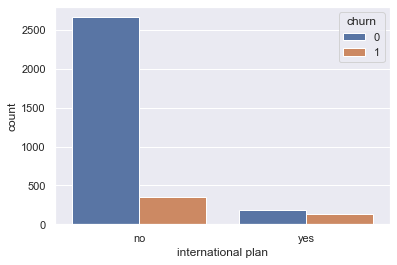

In [14]:
# plot a histogram for visualization of the international plan compared to the churn status.
sns.set_theme(style = 'darkgrid')
ax = sns.countplot(x='international plan', hue = 'churn', data=df);

###### International plan vs churn Observation

 - From above it is evident that the clients who did't have the international plan continued being customers as compared to those had the plan. This meant that having the international plan did't stop the customers from leaving.

   ###### Voice Mail Plan Vs Churn

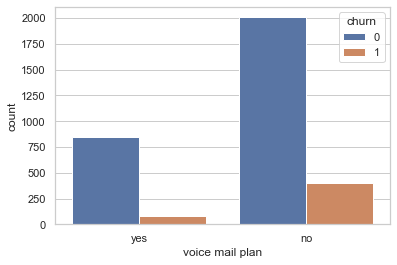

In [15]:
#visualizaion of Voice mail vs churn
sns.set_theme(style = 'whitegrid')
ax = sns.countplot(x='voice mail plan', hue = 'churn', data=df)

###### Observations

 - The customers who had a voice mail plan were less compared to those who didn't purchase the plan.  2000 customers which is 60% of the data didn't have the voice mail plan and they decided to stay. 

##### Area code vs churn

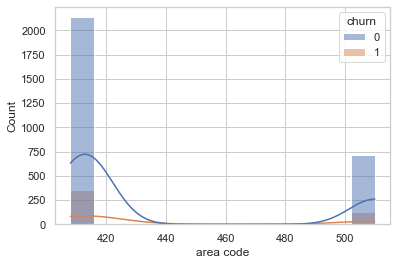

In [16]:
# Checking the distribution of area code vs churn
sns.set_theme(style = 'whitegrid')
ax = sns.histplot(x='area code',kde=True, hue = 'churn', data=df)

###### Area code observations
 - The area code determined the total number of customers that wanted to transact with SyriaTel. The area code between 300-400 had more subscriptions and more customers were willing to continue transacting and a very small number less that 10% of the customers that did churn.

###### Total Customer Charge, Minutes and calls
- To avoid overfitting of the models, there was need to combine how much each customer was getting charge, how many minutes they were consuming and the number of calls they made from morning to night. 
- This as well was the case for the international calls

In [17]:
#Total Customer Charges morning, eve and night

df['total_customer_charge'] = df['total day charge'] + df['total eve charge']+ df['total night charge']
df['total_customer_charge'].head()

0    72.86
1    55.54
2    59.00
3    65.02
4    49.36
Name: total_customer_charge, dtype: float64

In [18]:
# Total Customer Minutes morning, eve and night
df['total_customer_minutes'] = df['total day minutes'] + df['total eve minutes']+ df['total night minutes']
df['total_customer_minutes'].head()

0    707.2
1    611.5
2    527.2
3    558.2
4    501.9
Name: total_customer_minutes, dtype: float64

In [19]:
# Total Customer Calls morning, eve and night
df['total_customer_calls'] = df['total day calls'] + df['total eve calls']+ df['total night calls']
df['total_customer_calls'].head()

0    300.0
1    329.0
2    328.0
3    248.0
4    356.0
Name: total_customer_calls, dtype: float64

In [20]:
def numeric_distributions(df, numeric_variable, target_variable):
    # Plot numeric distributions based on the target variable    
    sns.histplot(data=df, x=numeric_variable, hue=target_variable, kde=True)
    # Set the title of the plot
    plt.title('Charges vs churn Distribution')
    # Plot Graph
    plt.show()

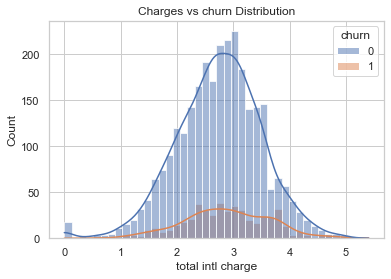

In [21]:
numeric_distributions(df, 'total intl charge','churn')

###### Total International charges observations
- Customers still chose to stay regardless of spending alot for international calls.
- Those who left didn't spend as muuch as those thoe who were decided to stay.

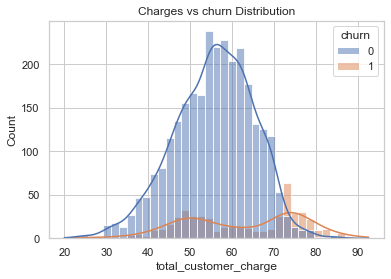

In [22]:
numeric_distributions(df, 'total_customer_charge','churn')

###### Total Customer Charges
- The more the customer spent was being affected in a way that those who sepnt alot in a day ended up churning. 

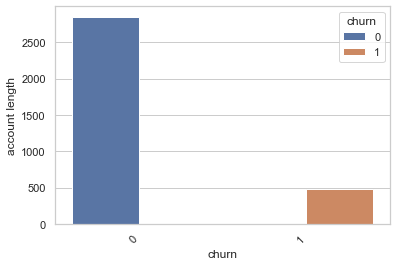

In [23]:
# Plot Number of account length against customer status
ax = sns.countplot(data=df, x='churn', hue = 'churn')
plt.xlabel('churn')
plt.ylabel('account length')
# Adjust x-tick labels alignment
plt.xticks(rotation=45, ha='right')
plt.show()

###### Account length 
 - Customer loyalty is witnessed as those customers who stayedwere those that had been using SyriaTel for long compared to the most current ones.

In [24]:
def df_correlation(df):
    """
    A function to plot the correlation of variables in the DataFrame using Heatmap
    Parameters:
       df(DataFrame): The input DataFrame.
    """
# Calculate the correlation of features in the DataFrame
    correlation_matrix= df.corr()
    # Plot a heatmap of the correlation matrix above
    fig, ax = plt.subplots(figsize =(25, 14))
    sns.heatmap(correlation_matrix, annot=True, linewidths = 0.5, cmap='coolwarm')
    # Set the font properties of the heatmap
    font_properties = {'family': 'serif', 'size': 16, 'weight': 'bold'}
    plt.xticks(fontproperties=font_properties)
    plt.yticks(fontproperties=font_properties)
    # Set the title of the graph
    plt.title('Data Correlation Matrix', fontdict=font_properties)
    # Show the plotted graph
    plt.show()

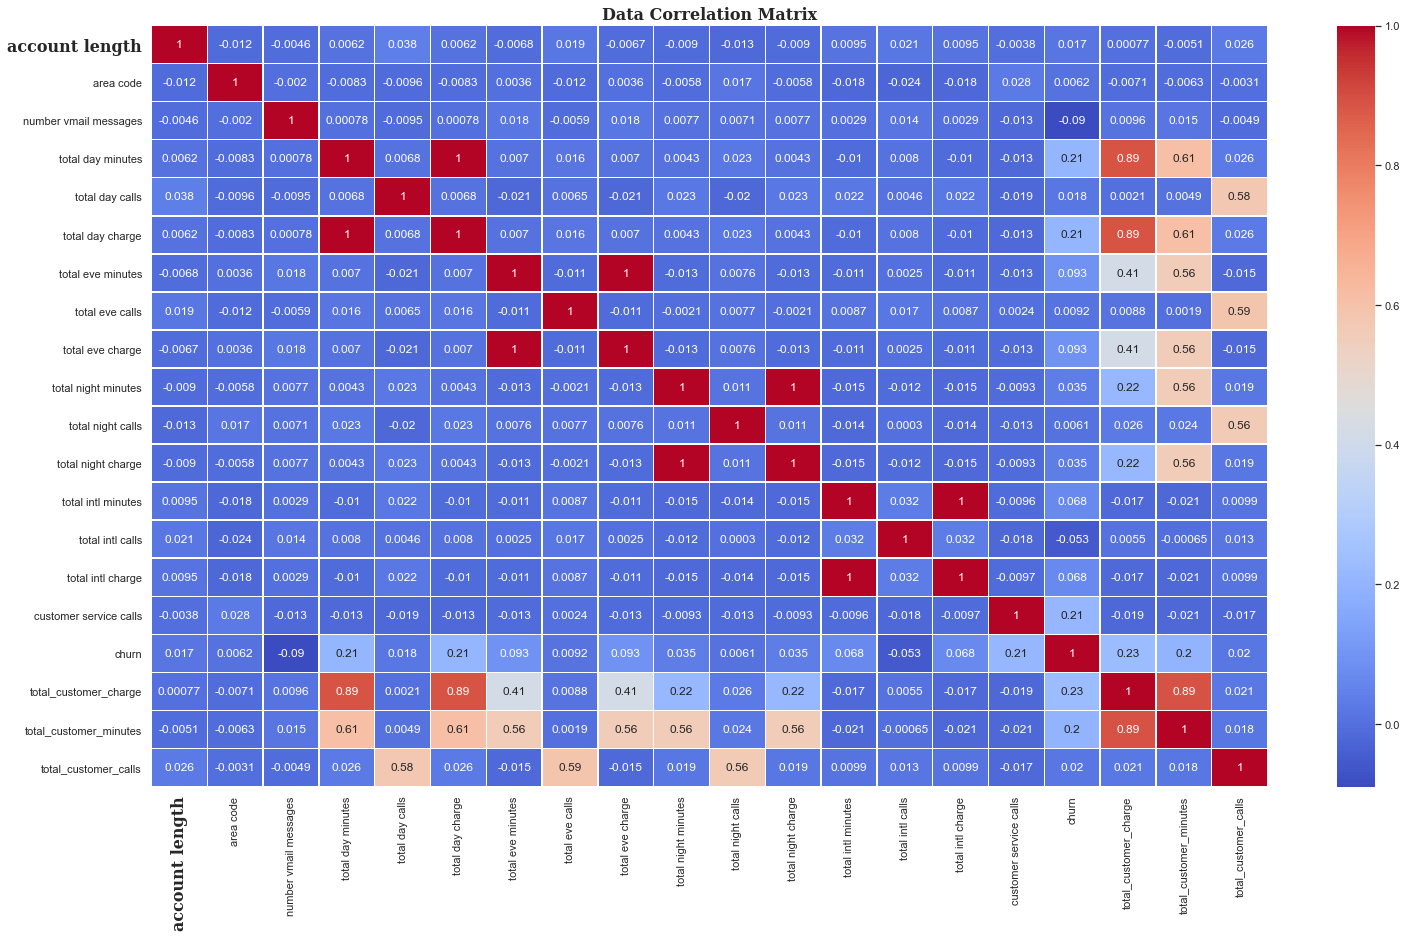

In [25]:
# checking for data's correlation
df_correlation(df)

# One Hot and Encoding 

In [26]:
#perform a one hot encoding
categorical = ['international plan', 'voice mail plan']
ohe_df = pd.get_dummies(df[categorical], prefix = categorical, drop_first=True )

In [27]:
#concat the ohe.df and the first df
new_df = pd.concat([ohe_df, df[['account length', 'area code','number vmail messages',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'total_customer_charge',
       'total_customer_minutes', 'total_customer_calls']]], axis = 1)

In [28]:
#checking the new dataframe
new_df .head()

,international plan_yes,voice mail plan_yes,account length,area code,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,total_customer_charge,total_customer_minutes,total_customer_calls
0,0,1,128.0,415.0,25.0,10.0,3.0,2.70,1.0,72.86,707.2,300.0
1,0,1,107.0,415.0,26.0,13.7,3.0,3.70,1.0,55.54,611.5,329.0
2,0,0,137.0,415.0,0.0,12.2,5.0,3.29,0.0,59.00,527.2,328.0
3,1,0,84.0,408.0,0.0,6.6,7.0,1.78,2.0,65.02,558.2,248.0
4,1,0,75.0,415.0,0.0,10.1,3.0,2.73,3.0,49.36,501.9,356.0


## Data Splitting

In [29]:
#performing train test split
X = new_df
y = df.churn
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=42)

# MODELLING

### LOGISTIC REGRESSION MODEL (Vanilla Model)

In [30]:
#creating a logistic regression using pipelines

pipe = Pipeline([('lrs', StandardScaler()),
                ('logreg', LogisticRegression())])
#fit the model

pipe.fit(X_train, y_train)

Pipeline(steps=[('lrs', StandardScaler()), ('logreg', LogisticRegression())])

In [31]:
# data prediction
y_pred = pipe.predict(X_test)

In [32]:
# checking the performance of my logistic regression

def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average='weighted')))
    print("Recall Score: {}".format(recall_score(labels, preds, average='weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average='weighted')))
print_metrics(y_test, y_pred)

Precision Score: 0.8319765862656013
Recall Score: 0.8590704647676162
Accuracy Score: 0.8590704647676162
F1 Score: 0.8258063904063699


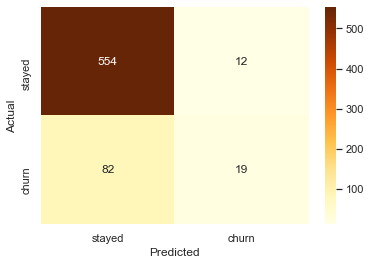

In [33]:
# using confusion matrix to visualize the model
# Logistic confusion matrix
from sklearn import metrics
cnf_metrix = (metrics.confusion_matrix(y_test,y_pred))
sns.heatmap(cnf_metrix,cmap = 'YlOrBr',xticklabels=['stayed','churn'],yticklabels=['stayed','churn'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('Actual');

### K Nearest Neighbour model

In [34]:
# using pipeline to make KNN model 
pipe1 = Pipeline([('mms', StandardScaler()),
                ('neighbors', KNeighborsClassifier())])
pipe1.fit(X_train, y_train)

Pipeline(steps=[('mms', StandardScaler()),
                ('neighbors', KNeighborsClassifier())])

In [35]:
# knn predictions for X_test
y_pred1 = pipe1.predict(X_test)

In [36]:
# Checking for KNN metrics
print_metrics(y_test, y_pred1)

Precision Score: 0.8935402064034377
Recall Score: 0.896551724137931
Accuracy Score: 0.896551724137931
F1 Score: 0.8786984136190946


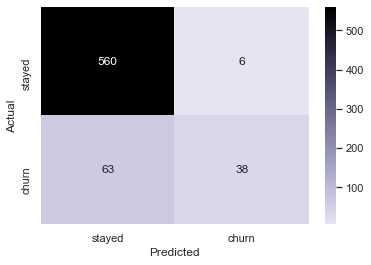

In [37]:
# using confusion matrix to visualize the model
# KNN confusion matrix
from sklearn import metrics
cnf_metrix = (metrics.confusion_matrix(y_test,y_pred1))
cmap = sns.cubehelix_palette(50, hue=0.5, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cnf_metrix,cmap = cmap,xticklabels=['stayed','churn'],yticklabels=['stayed','churn'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('Actual');

 - The model performed well compared to the vanilla model as it got a higher accuracy of 89.65%.
 - The confusion matrix also changed as the predictions churn status were closer to the actual churn status.

### Decision Tree Model

In [38]:
from sklearn.tree import DecisionTreeClassifier

# To control overfitting you tune by the of use max_depth of 1 
pipe2 = Pipeline([('sss', StandardScaler()),
                ('trees', DecisionTreeClassifier(random_state=42, max_depth = 1))])
pipe2.fit(X_train, y_train)

Pipeline(steps=[('sss', StandardScaler()),
                ('trees',
                 DecisionTreeClassifier(max_depth=1, random_state=42))])

In [39]:
# Train and fir the model
y_pred2 = pipe2.predict(X_test)
print_metrics (y_test, y_pred2)

Precision Score: 0.8932939711159872
Recall Score: 0.9010494752623688
Accuracy Score: 0.9010494752623688
F1 Score: 0.89119258382066


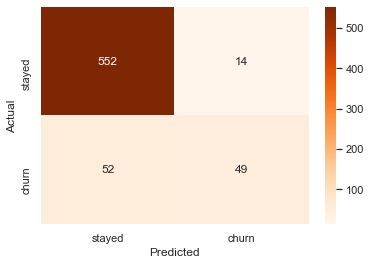

In [40]:
# using confusion matrix to visualize the model
# decision tree confusion matrix
from sklearn import metrics
cnf_metrix = (metrics.confusion_matrix(y_test,y_pred2))
sns.heatmap(cnf_metrix,cmap = 'Oranges',xticklabels=['stayed','churn'],yticklabels=['stayed','churn'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('Actual');

 - This is the best performing model of the 3 as it has an accuracy of 90.1% which is a good performance.
 - The predictions of churn status to the actual churn status were improved which is an indication that the model performed well.

## Random Forest 

In [41]:
#use pipeline to create a model
pipe3 = Pipeline([('rfm', RandomForestClassifier())])

# gridsearch to help pick the best performing feature used cv = 5 and max_depth

grid = {'rfm__max_depth': [2,5]}
grid_search = GridSearchCV(estimator = pipe3, 
                          param_grid = grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rfm', RandomForestClassifier())]),
             param_grid={'rfm__max_depth': [2, 5]})

In [42]:
# predict and print the metrics
y_pred3 = grid_search.predict(X_test)
print_metrics(y_test, y_pred3)

Precision Score: 0.964890649482802
Recall Score: 0.9640179910044977
Accuracy Score: 0.9640179910044977
F1 Score: 0.9621620732094956


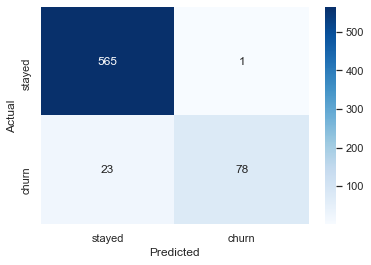

In [43]:
# using confusion matrix to visualize the model
# Random forest confusion matrix
from sklearn import metrics
cnf_metrix = (metrics.confusion_matrix(y_test,y_pred3))
sns.heatmap(cnf_metrix,cmap = 'Blues', xticklabels=['stayed','churn'],yticklabels=['stayed','churn'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('Actual');

 - For the random forest even after introducing penalties it almost overfitted which is why its not the best permorming model. 
 - The confusion matrix was perfect which would have been a result of cramming the results with each iteration.

## Conclusion
 - The churn status was affected by the total customer charges, intenational plan, customer service calls, area, voice mail plan and account length.
 - The data was also biased area wise which was not as sufficient though a very important variable to analyse. 
 - The model confusion matrix performed well for predictions and the actual churn status. 

## Recommendation
 - SyriaTel should consider improving the area coverage to attract more customers and to reduce the churn levels.
 - The international plan maybe an expensive idea as it doesn't win the customer loyalty. The plan should be reconsidered to minimize losses and for the company to attract even more customers.
 - The company should come up with a plan where those that spend most in a day are either rewarded or their calling rates are reduced at a certain point of the day. This is because, it was evident the more the customers spent in a day, the higher the chances of churning ehich is a loss for the company.
 - The voice mail plan doesn't should be reconsidered either by evaluating the customers culture of maybe preferring phone calls over voice mail or by reducing its charging rates to attract more of both new and current suctomers.